In [87]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
import pandas as pd
import numpy as np

# Вычисления numpy

In [88]:
# скаляр
x = np.array(28)
x

array(28)

In [89]:
x.ndim, x.shape

(0, ())

In [90]:
# Вектор (одноранговый тензор)
x = np.array([3, 56, 76, 25, 88, 44])
x

array([ 3, 56, 76, 25, 88, 44])

In [91]:
x.ndim, x.shape

(1, (6,))

In [92]:
# Матрица (тензор ранга два)
x = np.array([[3, 56, 76, 25, 88, 44],
              [3, 56, 76, 25, 88, 44],
              [3, 56, 76, 25, 88, 44],
              [3, 56, 76, 25, 88, 44]])
#x

In [93]:
x.ndim, x.shape

(2, (4, 6))

In [94]:
# Тензор ранга три
x = np.array([[[3, 56, 76, 25, 88, 44],
              [3, 56, 76, 25, 88, 44],
              [3, 56, 76, 25, 88, 44],
              [3, 56, 76, 25, 88, 44]],
              [[3, 56, 76, 25, 88, 44],
              [3, 56, 76, 25, 88, 44],
              [3, 56, 76, 25, 88, 44],
              [3, 56, 76, 25, 88, 44]],
              [[3, 56, 76, 25, 88, 44],
              [3, 56, 76, 25, 88, 44],
              [3, 56, 76, 25, 88, 44],
              [3, 56, 76, 25, 88, 44]]])

#x.ndim, x.shape

In [95]:
x.ndim, x.shape

(3, (3, 4, 6))

In [96]:
# Загрузим вчерашние цифры
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [97]:
# выведет (3, (60000, 28, 28)), где на тренировочных данных 60000 изображений на 28(длина) на 28(ширина) пикселей.
train_images.ndim, train_images.shape

(3, (60000, 28, 28))

In [179]:
# Нарисуем
import matplotlib.pyplot as plt
digit = train_images[4]
#plt.imshow(digit, cmap=plt.cm.binary)
#plt.show()

In [98]:
# Повторим срезы
#количество образцов с 10 по 99
slice_1 = train_images[10:100]
slice_1.shape

(90, 28, 28)

In [99]:
slice_2 = train_images[10:100,:,:]
slice_2.shape

(90, 28, 28)

In [100]:
slice_3 = train_images[10:100,0:28,0:28]
slice_3.shape

(90, 28, 28)

In [102]:
# берем 18 образец с 7 по 21 элементы (обрезаем сверхну,сниху,слева,справа по 7 строчек)
slice_4 = train_images[18,7:-7,7:-7]

In [111]:
slice_4 = train_images[18,:,:15]

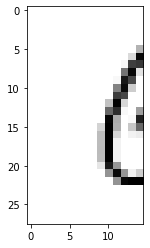

In [112]:
from matplotlib import pyplot as plt
plt.imshow(slice_4, cmap=plt.cm.binary)
plt.show()

In [113]:
from tensorflow.keras.preprocessing import image
img = image.load_img('photo_2022-02-17_21-15-55.jpg')


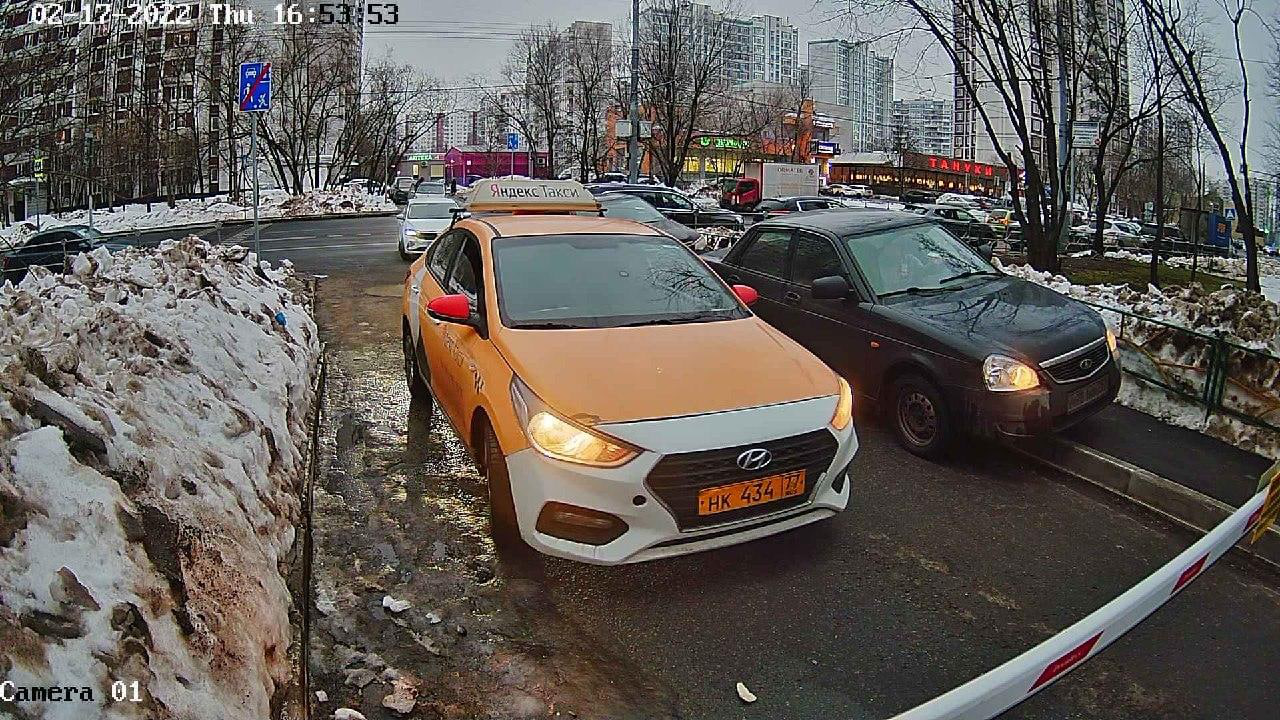

In [114]:
img

In [115]:
img_= image.img_to_array(img)

In [116]:
img_

array([[[ 43.,  38.,  61.],
        [  0.,   0.,  19.],
        [ 43.,  40.,  61.],
        ...,
        [135., 152., 168.],
        [139., 156., 172.],
        [143., 160., 176.]],

       [[ 16.,  12.,  35.],
        [ 43.,  41.,  63.],
        [  3.,   1.,  22.],
        ...,
        [132., 149., 165.],
        [143., 160., 176.],
        [153., 170., 186.]],

       [[  3.,   4.,  25.],
        [ 13.,  14.,  34.],
        [  0.,   0.,  18.],
        ...,
        [129., 147., 161.],
        [138., 156., 170.],
        [148., 166., 180.]],

       ...,

       [[137., 144., 137.],
        [124., 131., 124.],
        [128., 138., 130.],
        ...,
        [ 43.,  43.,  43.],
        [ 44.,  44.,  44.],
        [ 42.,  42.,  42.]],

       [[155., 162., 155.],
        [122., 129., 122.],
        [103., 113., 105.],
        ...,
        [ 42.,  42.,  42.],
        [ 44.,  44.,  44.],
        [ 42.,  42.,  42.]],

       [[118., 125., 118.],
        [152., 159., 152.],
        [140., 1

In [118]:
img_.shape

(720, 1280, 3)

In [130]:
sl = img_[20:620,400:800,:]

In [131]:
sl[:,:,2] = 255

# в 3-ем измерении заложены цвета!!!, в 1-м строки,во 2-м столбцы!!!

# В изображении идет по порядку высота ,ширина и номер канала

In [134]:
sl

array([[[168., 176., 255.],
        [168., 176., 255.],
        [168., 176., 255.],
        ...,
        [175., 182., 255.],
        [178., 185., 255.],
        [175., 182., 255.]],

       [[132., 140., 255.],
        [132., 140., 255.],
        [132., 140., 255.],
        ...,
        [176., 184., 255.],
        [175., 183., 255.],
        [173., 181., 255.]],

       [[166., 174., 255.],
        [166., 174., 255.],
        [166., 174., 255.],
        ...,
        [175., 183., 255.],
        [171., 179., 255.],
        [174., 182., 255.]],

       ...,

       [[ 51.,  47., 255.],
        [ 47.,  43., 255.],
        [ 71.,  67., 255.],
        ...,
        [ 50.,  40., 255.],
        [ 48.,  38., 255.],
        [ 77.,  66., 255.]],

       [[ 58.,  54., 255.],
        [  8.,   4., 255.],
        [  7.,   3., 255.],
        ...,
        [ 45.,  35., 255.],
        [ 27.,  17., 255.],
        [ 28.,  18., 255.]],

       [[168., 164., 255.],
        [113., 109., 255.],
        [100.,  

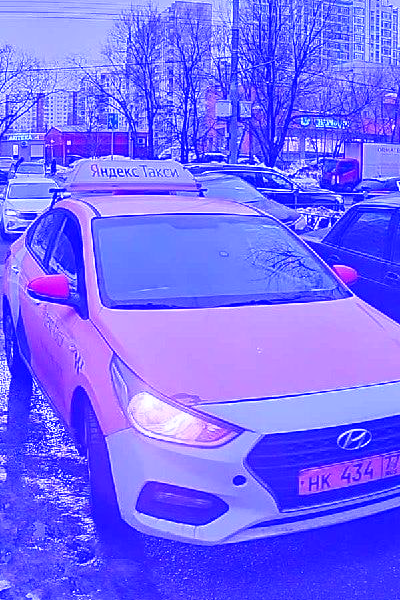

In [135]:
image.array_to_img(sl)

In [ ]:
# Пакеты данных - это те самые срезы по образцам.
batch = train_images[:128]
# НИЖЕ ПАРАМЕТР BATCH_SIZE - КОЛИЧЕСТВО ПРИМЕРОВ,КОТОРЫЕ ПРОХОДЯТ ЧЕРЕЗ СЕТЬ И ПОСЛЕ ИХ ПРОХОЖДЕИЯ СЕТЬ МЕНЯЕТ ПАРАМЕТРЫ ,И МЕНЯЮТСЯ ВЕСА. 

In [ ]:
# Примеры тензоров с данными


# Воспоминания о циклах python

In [192]:
# relu - пишем матричную функцию (т.е. принимает матрицу и поэлементно применяет relu)


In [136]:
# add - пишем поэлементное сложение
def add_m_element(x,y):
    
    assert len(x.shape) == 2,'axis not 2'
    if x.shape!= y.shape:
        return 'dif shapes, try again'
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[i,j]
    return x
            
            
        
        
            
                

In [137]:
x = np.random.random((20,100))
y = np.random.random((20,100))
add_m_element(x,y).shape

(20, 100)

In [2]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = shollet_add(x, y)
    z = shollet_relu(z)
#print("Took: {0:.2f} s".format(time.time() - t0))

NameError: name 'np' is not defined

In [196]:
# понятно что можно было так
z = x + y

In [197]:
# и так
z = np.maximum(z, 0.)

In [1]:
#z.shape

In [200]:
t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
#print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [201]:
# Расширение тензора
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [210]:
y = np.expand_dims(y, axis=0)

In [214]:
Y = np.concatenate([y] * 32, axis=0)

In [ ]:
# Пишем добавление вектора к матрице


In [138]:
# reshape
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
#x.shape

In [140]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [141]:
x = x.reshape(6)
x

array([0., 1., 2., 3., 4., 5.])

In [142]:
x.reshape(-1,1)

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [143]:
x.reshape(1,-1)

array([[0., 1., 2., 3., 4., 5.]])

In [252]:
#np.expand_dims(x, axis = 1)

In [235]:
X = np.random.random((32, 10))
X = X.reshape((4,8,10))

## Задача про колледж

In [144]:
# Рисовалка кривых обучения

def draw_curves (history, los, metric):
    
    acc = history.history[metric]
    val_acc = history.history['val_'+metric]
    loss = history.history[los]
    val_loss = history.history['val_'+los]

    epochs = range(1, len(acc)+1)
    plt.plot(epochs, acc, 'bo', label = 'Training '+metric)
    plt.plot(epochs, val_acc, 'b', label = 'Validation '+metric)
    plt.title('Training and Validation '+metric)
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label = 'Training loss')
    plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()

    plt.show()


In [145]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
import pandas as pd

In [146]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
sc = MinMaxScaler()

In [147]:
df = pd.read_csv('data.csv')

In [148]:
df['type_school'] = df['type_school'].map({'Academic':0, 'Vocational':1})
df['school_accreditation'] = df['school_accreditation'].map({'A':0, 'B':1})
df['gender'] = df['gender'].map({'Male':0, 'Female':1})
df['residence'] = df['residence'].map({'Rural':0, 'Urban':1})
df['parent_was_in_college'] = df['parent_was_in_college'].map({False:0, True:1})
df['in_college'] = df['in_college'].map({False:0, True:1})
df = pd.get_dummies(df,columns=['interest'])

In [149]:
X = df.drop(['in_college'], axis = 1)
Y = df['in_college']

In [150]:
X = sc.fit_transform(X)

In [151]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size = 0.25, random_state = 0)

In [152]:
X.shape

(1000, 14)

In [159]:
model = models.Sequential()
#layers.Dense - слой самых протсых нейроннов,берем 512 штук
#input_shape = (14, - это размерность наших данных
# У НАС БИНАРНАЯ КЛАССИФИКАЦИЯ И НАМ ХОРОШО ПОДХОДИТ СИГМОИДАЛЬНАЯ ФУНКЦИЯ (activation="sigmoid")
# НЕЙРОН 1 РЕШАЕТ ,0- не поступает, 1 ,поступает ученик из наших данных выше.
#
model.add(layers.Dense(512, activation="relu", input_shape = (14,)))
model.add(layers.Dense(1, activation="sigmoid"))
#model.add(layers.Dense(3, activation="softmax"))
# 3- если у нас не бинарная классификация, а 3-х например.

In [160]:
# Компиляция модели
# проверяем на этом этапе функцию потерь(двоичная кросс энтропия-оптимизирует функцию потери)
#  и нужен оптимайзер,который заставляет веса подстраивать, в нашем примере это метрика accuracy( правильное попадание в класс)
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#МОЖНО ВЫБИРАТЬ НЕСКОЛЬКО МЕТРИК (ВНИМАТЕЛЬНО :РЕГРЕССИЯ ИЛИ КЛАССИФИКАЦИЯ!)  metrics=["accuracy","AUC"])

In [161]:
#смотрим на количество параметров
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               7680      
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 8,193
Trainable params: 8,193
Non-trainable params: 0
_________________________________________________________________


In [162]:
# batch_size=32 - 32 строчки,обучающих примера предъьявляться будет сети,потом накапливается ошибка,распространяется и веса накапливаются
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=75, batch_size=32)

Epoch 1/75
24/24 [==============================] - 10s 223ms/step - loss: 0.6656 - accuracy: 0.6120 - val_loss: 0.6372 - val_accuracy: 0.6760
Epoch 2/75
24/24 [==============================] - 4s 156ms/step - loss: 0.6135 - accuracy: 0.6707 - val_loss: 0.5959 - val_accuracy: 0.6520
Epoch 3/75
24/24 [==============================] - 1s 64ms/step - loss: 0.5747 - accuracy: 0.7213 - val_loss: 0.5613 - val_accuracy: 0.7160
Epoch 4/75
24/24 [==============================] - 2s 69ms/step - loss: 0.5379 - accuracy: 0.7413 - val_loss: 0.5372 - val_accuracy: 0.7400
Epoch 5/75
24/24 [==============================] - 1s 64ms/step - loss: 0.5088 - accuracy: 0.7680 - val_loss: 0.5201 - val_accuracy: 0.7360
Epoch 6/75
24/24 [==============================] - 1s 55ms/step - loss: 0.4722 - accuracy: 0.8093 - val_loss: 0.4745 - val_accuracy: 0.7880
Epoch 7/75
24/24 [==============================] - 1s 52ms/step - loss: 0.4373 - accuracy: 0.8333 - val_loss: 0.4463 - val_accuracy: 0.8120
Epoch 8/75

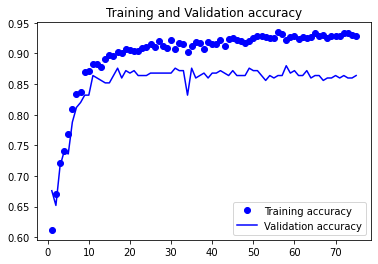

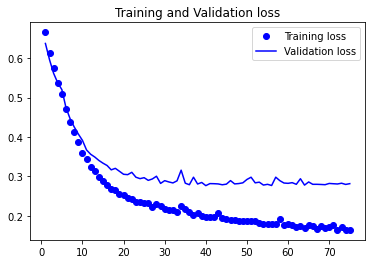

In [163]:
draw_curves(history, 'loss', 'accuracy')
# draw_curves(history, 'loss', 'auc')

In [164]:
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, mean_absolute_error

In [165]:
#мы передаем двумерный тензор и прогноз получим ввиде двумерного тензора.
pred = model.predict(X_test)

8/8 [==============================] - 4s 2ms/step


In [166]:
pred

array([[1.62290293e-03],
       [2.02869028e-02],
       [6.66158259e-01],
       [9.92107153e-01],
       [9.94322062e-01],
       [9.88500357e-01],
       [3.75055701e-01],
       [9.94442642e-01],
       [9.99772489e-01],
       [5.06678402e-01],
       [9.94375587e-01],
       [1.92784704e-02],
       [9.17566046e-02],
       [1.28810748e-01],
       [9.98401165e-01],
       [9.97400641e-01],
       [9.87990916e-01],
       [2.97828205e-03],
       [7.38998409e-03],
       [9.06328917e-01],
       [1.13629676e-01],
       [9.98459756e-01],
       [3.75426083e-04],
       [7.01828906e-03],
       [1.03990212e-02],
       [9.96972084e-01],
       [3.20514827e-03],
       [7.65323348e-04],
       [5.24098754e-01],
       [8.52912515e-02],
       [2.05448195e-02],
       [6.08650930e-02],
       [6.92310810e-01],
       [9.56421494e-01],
       [1.34441614e-01],
       [3.17781508e-01],
       [8.50235879e-01],
       [5.88845253e-01],
       [9.99832034e-01],
       [9.99092221e-01],


In [167]:
# мы передаем сюда имеено вероятности!!!!!
roc_auc_score(Y_test, pred)

0.9535732581967213

In [8]:
#precision_score(Y_test, pred), recall_score(Y_test, pred)

# Задача про калифорнию

In [325]:
df = pd.read_csv('housing.csv')

In [326]:
# mediana
mediantb = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(mediantb, inplace = True)


In [327]:
# new fatures
df['rooms_per_house'] = df['total_rooms'] / df['households']
df['bebrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_house_hold'] = df['population'] / df['households']
df = pd.get_dummies(df,columns=['ocean_proximity'])

In [328]:
X = df.drop(['median_house_value'], axis = 1)
Y = df['median_house_value']

In [329]:
mean = X.mean(axis = 0)
X -= mean
std = X.std()
X /= std

In [330]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size = 0.25, random_state = 0)

In [331]:
X_train.shape

(15480, 16)

In [361]:
# начать с глубокой модели

In [369]:
# compile


In [12]:
# train


In [10]:
#draw_curves(history, 'loss', 'mae')

In [355]:
pred = model.predict(X_test)

In [11]:
#(mean_absolute_error(Y_test, pred))